<a href="https://www.kaggle.com/code/lalit7881/diabetes-risk-prediction-mexico-dataset-acc-99?scriptVersionId=295073746" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-mexico-data-set/Diabetes_Mexico.csv


## Title:
Diabetes Prevalence & Risk Factors – Mexico Dataset

In [2]:
df = pd.read_csv("/kaggle/input/diabetes-mexico-data-set/Diabetes_Mexico.csv")

In [3]:
df.head()

,folio_i,folio_int,sexo,edad,Ciudad,Peso,Estatura,imc,muestra_suero,ac_urico,...,creat,glu_suero,insulina,trig,hb1ac,ponde_venosa,estrato,est_sel,ponde_hemo,riesgo_diabetes_cat
0,2024_01001010,2024_01001010_01,Mujer,89.0,AGUASCALIENTES,NaN,NaN,NaN,1.0,"4,1",...,"0,62",166.0,"4,7",107.0,NaN,"2245,917738",3.0,13.0,"2888,530238",2
1,2024_01001012,2024_01001012_01,Mujer,71.0,AGUASCALIENTES,NaN,NaN,32.0,1.0,"4,3",...,"0,64",98.0,"9,6",132.0,NaN,"2245,917738",3.0,13.0,"2888,530238",1
2,2024_01001016,2024_01001016_02,Mujer,57.0,AGUASCALIENTES,"80,25","170,6",NaN,1.0,"4,9",...,"0,6",128.0,"4,7",263.0,6.0,"4047,445276",3.0,13.0,NaN,2
3,2024_01001016,2024_01001016_05,Mujer,20.0,AGUASCALIENTES,"68,6","166,2",NaN,1.0,"4,9",...,"0,63",112.0,"10,1",238.0,NaN,"13079,14232",3.0,13.0,"13776,80526",2
4,2024_01001031,2024_01001031_01,Hombre,74.0,AGUASCALIENTES,NaN,NaN,NaN,1.0,"6,4",...,"1,09",97.0,"10,2",135.0,NaN,"5292,158204",3.0,13.0,"5824,779445",0


In [4]:
df.tail()

,folio_i,folio_int,sexo,edad,Ciudad,Peso,Estatura,imc,muestra_suero,ac_urico,...,creat,glu_suero,insulina,trig,hb1ac,ponde_venosa,estrato,est_sel,ponde_hemo,riesgo_diabetes_cat
2544,2024_32056012,2024_32056012_01,Mujer,66.0,ZACATECAS,NaN,NaN,NaN,1.0,"4,8",...,"0,72",89.0,"6,4",179.0,NaN,"6532,590705",3.0,323.0,"9897,955004",0
2545,2024_32056022,2024_32056022_02,Mujer,51.0,ZACATECAS,"97,6","171,2",NaN,1.0,"5,8",...,"0,69",98.0,"35,2",126.0,NaN,"13055,89557",3.0,323.0,NaN,0
2546,2024_32056024,2024_32056024_01,Hombre,45.0,ZACATECAS,"90,95","172,4",NaN,1.0,"6,7",...,"0,82",94.0,"17,8",119.0,NaN,"6394,811934",3.0,323.0,NaN,0
2547,2024_32056024,2024_32056024_02,Mujer,38.0,ZACATECAS,"69,3","152,8",NaN,1.0,"4,6",...,"0,56",88.0,"10,7",132.0,5.0,"13189,49573",3.0,323.0,"20012,01206",0
2548,2024_32056029,2024_32056029_01,Hombre,44.0,ZACATECAS,"76,85","164,4",NaN,1.0,"6,5",...,"0,67",136.0,"3,7",73.0,NaN,"63723,9608",3.0,323.0,NaN,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2549 entries, 0 to 2548
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   folio_i              2549 non-null   object 
 1   folio_int            2549 non-null   object 
 2   sexo                 2549 non-null   object 
 3   edad                 2524 non-null   float64
 4   Ciudad               2549 non-null   object 
 5   Peso                 1829 non-null   object 
 6   Estatura             1829 non-null   object 
 7   imc                  35 non-null     float64
 8   muestra_suero        2549 non-null   float64
 9   ac_urico             2549 non-null   object 
 10  albu                 2549 non-null   object 
 11  col_hdl              2549 non-null   object 
 12  col_ldl              2549 non-null   float64
 13  colest               2549 non-null   float64
 14  creat                2549 non-null   object 
 15  glu_suero            2549 non-null   f

In [6]:
df.describe()

,edad,imc,muestra_suero,col_ldl,colest,glu_suero,trig,hb1ac,estrato,est_sel,riesgo_diabetes_cat
count,2524.000000,35.000000,2549.0,2549.000000,2549.000000,2549.000000,2549.000000,241.000000,2549.000000,2549.000000,2549.000000
mean,35.763074,29.971429,1.0,91.143978,143.023146,105.541389,153.564143,5.809129,2.088662,167.799137,0.663790
std,319.672846,7.633077,0.0,29.904939,42.458243,51.922275,126.311311,1.450890,0.825411,94.420560,0.939469
min,-7975.000000,15.000000,1.0,16.000000,25.000000,32.000000,24.000000,5.000000,1.000000,11.000000,0.000000
25%,34.000000,25.000000,1.0,71.000000,115.000000,83.000000,87.000000,5.000000,1.000000,83.000000,0.000000
50%,47.500000,30.000000,1.0,88.000000,139.000000,92.000000,123.000000,5.000000,2.000000,172.000000,0.000000
75%,62.000000,32.500000,1.0,108.000000,166.000000,104.000000,181.000000,6.000000,3.000000,242.000000,2.000000
max,95.000000,56.000000,1.0,354.000000,625.000000,1116.000000,2834.000000,12.000000,3.000000,323.000000,2.000000


In [7]:
df.isnull().sum()

folio_i                   0
folio_int                 0
sexo                      0
edad                     25
Ciudad                    0
Peso                    720
Estatura                720
imc                    2514
muestra_suero             0
ac_urico                  0
albu                      0
col_hdl                   0
col_ldl                   0
colest                    0
creat                     0
glu_suero                 0
insulina                  0
trig                      0
hb1ac                  2308
ponde_venosa             99
estrato                   0
est_sel                   0
ponde_hemo              980
riesgo_diabetes_cat       0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.dtypes

folio_i                 object
folio_int               object
sexo                    object
edad                   float64
Ciudad                  object
Peso                    object
Estatura                object
imc                    float64
muestra_suero          float64
ac_urico                object
albu                    object
col_hdl                 object
col_ldl                float64
colest                 float64
creat                   object
glu_suero              float64
insulina                object
trig                   float64
hb1ac                  float64
ponde_venosa            object
estrato                float64
est_sel                float64
ponde_hemo              object
riesgo_diabetes_cat      int64
dtype: object

In [10]:
df.shape

(2549, 24)

In [11]:
df.columns

Index(['folio_i', 'folio_int', 'sexo', 'edad', 'Ciudad', 'Peso', 'Estatura',
       'imc', 'muestra_suero', 'ac_urico', 'albu', 'col_hdl', 'col_ldl',
       'colest', 'creat', 'glu_suero', 'insulina', 'trig', 'hb1ac',
       'ponde_venosa', 'estrato', 'est_sel', 'ponde_hemo',
       'riesgo_diabetes_cat'],
      dtype='object')

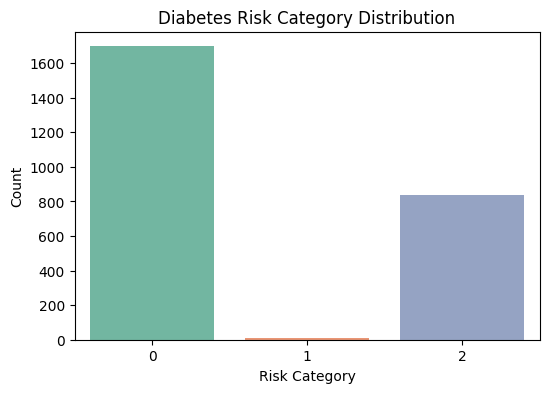

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(
    x='riesgo_diabetes_cat',
    data=df,
    palette='Set2'
)
plt.title('Diabetes Risk Category Distribution')
plt.xlabel('Risk Category')
plt.ylabel('Count')
plt.show()


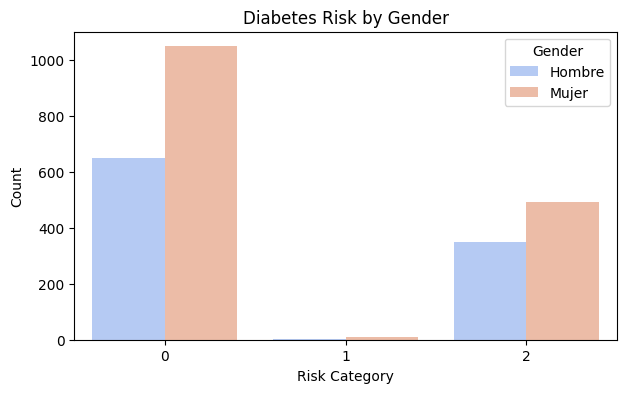

In [13]:
plt.figure(figsize=(7,4))
sns.countplot(
    x='riesgo_diabetes_cat',
    hue='sexo',
    data=df,
    palette='coolwarm'
)
plt.title('Diabetes Risk by Gender')
plt.xlabel('Risk Category')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()


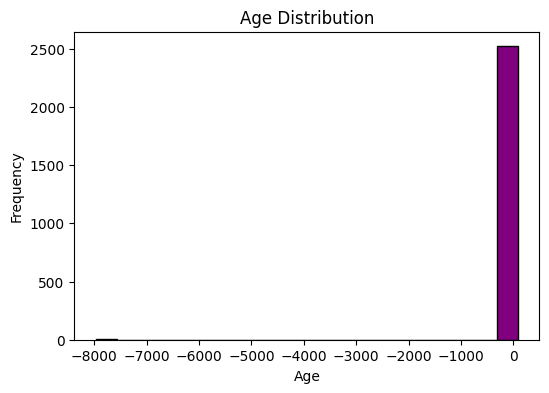

In [14]:
plt.figure(figsize=(6,4))
plt.hist(
    df['edad'],
    bins=20,
    color='purple',
    edgecolor='black'
)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


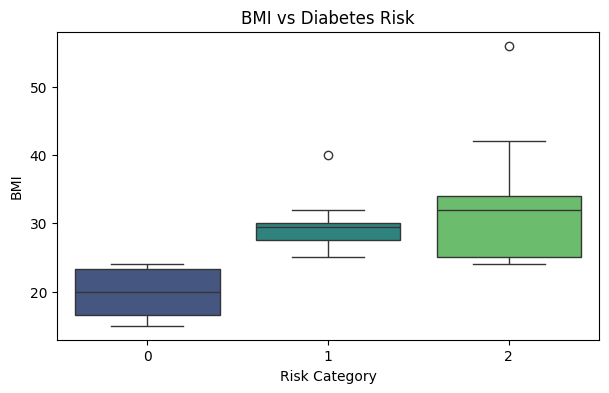

In [15]:
plt.figure(figsize=(7,4))
sns.boxplot(
    x='riesgo_diabetes_cat',
    y='imc',
    data=df,
    palette='viridis'
)
plt.title('BMI vs Diabetes Risk')
plt.xlabel('Risk Category')
plt.ylabel('BMI')
plt.show()


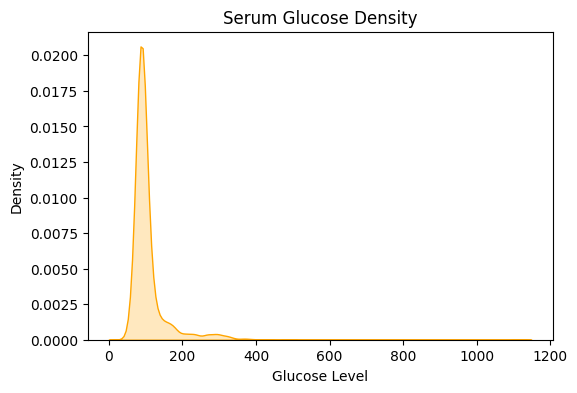

In [16]:
plt.figure(figsize=(6,4))
sns.kdeplot(
    df['glu_suero'],
    fill=True,
    color='orange'
)
plt.title('Serum Glucose Density')
plt.xlabel('Glucose Level')
plt.ylabel('Density')
plt.show()


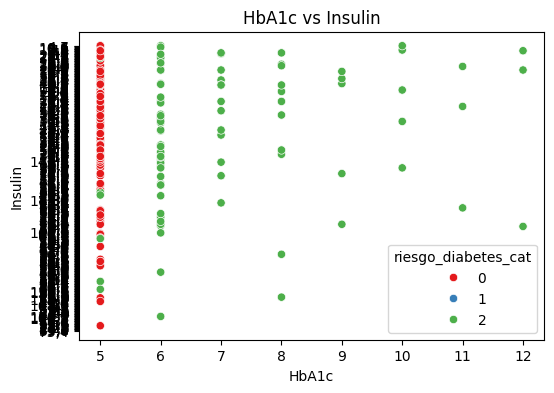

In [17]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='hb1ac',
    y='insulina',
    hue='riesgo_diabetes_cat',
    data=df,
    palette='Set1'
)
plt.title('HbA1c vs Insulin')
plt.xlabel('HbA1c')
plt.ylabel('Insulin')
plt.show()


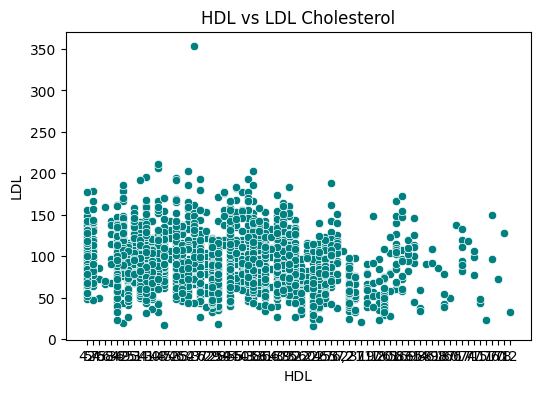

In [18]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='col_hdl',
    y='col_ldl',
    data=df,
    color='teal'
)
plt.title('HDL vs LDL Cholesterol')
plt.xlabel('HDL')
plt.ylabel('LDL')
plt.show()


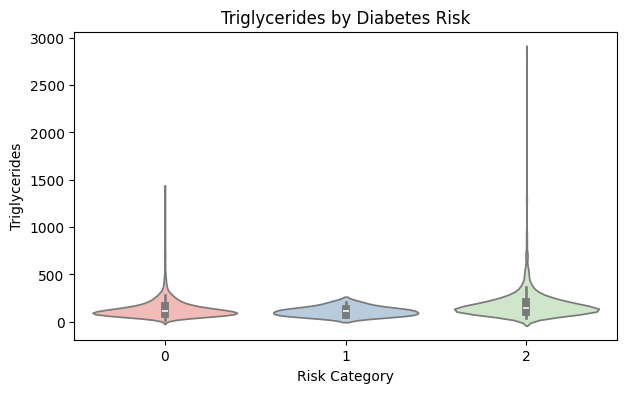

In [19]:
plt.figure(figsize=(7,4))
sns.violinplot(
    x='riesgo_diabetes_cat',
    y='trig',
    data=df,
    palette='Pastel1'
)
plt.title('Triglycerides by Diabetes Risk')
plt.xlabel('Risk Category')
plt.ylabel('Triglycerides')
plt.show()


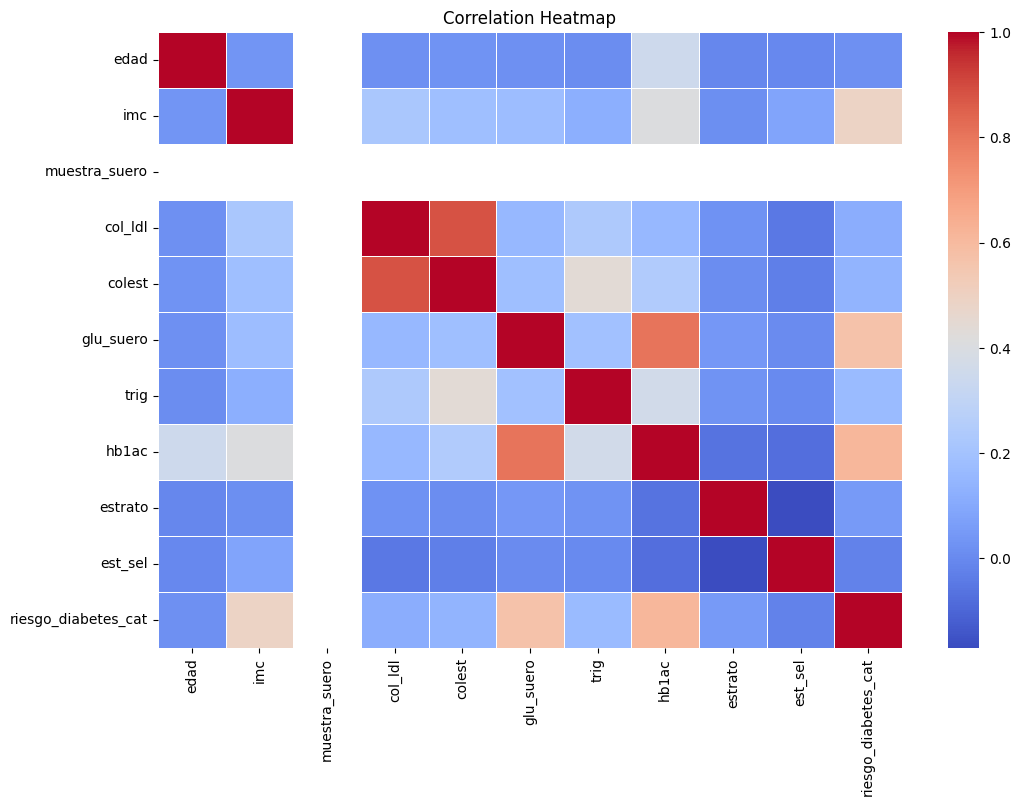

In [20]:
plt.figure(figsize=(12,8))
corr = df.select_dtypes(include='number').corr()

sns.heatmap(
    corr,
    cmap='coolwarm',
    annot=False,
    linewidths=0.5
)
plt.title('Correlation Heatmap')
plt.show()


## ML

## 📌 1️⃣ Feature-wise Insights Explanation
🔹 Demographic Features

edad (Age): Diabetes risk increases with age due to insulin resistance.

sexo (Gender): Hormonal and lifestyle differences influence risk patterns.

Ciudad: Urbanization often correlates with sedentary lifestyle and diet.

🔹 Body & Physical Measures

Peso, Estatura → IMC (BMI):

High BMI is a strong predictor of diabetes.

Obesity → insulin resistance → elevated glucose.

imc: One of the most influential features.

🔹 Biochemical Indicators

glu_suero: Direct indicator of blood glucose (primary diabetes marker).

hb1ac: Long-term glucose control (gold standard for diagnosis).

insulina: Insulin sensitivity and pancreatic function.

trig, col_hdl, col_ldl, colest: Dyslipidemia strongly linked to diabetes.

creat: Kidney function (diabetes complications marker).

ac_urico: Elevated levels often co-exist with metabolic syndrome.

🔹 Target Variable

riesgo_diabetes_cat:
Multiclass target indicating diabetes risk level (e.g., Low / Medium / High).

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [22]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace(',', '.', regex=False)

In [23]:
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except:
        pass

In [24]:
X = df.drop(columns=['riesgo_diabetes_cat'])
y = df['riesgo_diabetes_cat']

In [25]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

In [26]:
num_imputer = SimpleImputer(strategy='median')
X[num_cols] = num_imputer.fit_transform(X[num_cols])

# Categorical → Most Frequent
cat_imputer = SimpleImputer(strategy='most_frequent')
X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])

In [27]:
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col])

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [30]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Missing values:", np.isnan(X_train).sum())

Train shape: (2039, 23)
Test shape: (510, 23)
Missing values: 0


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score,
    mean_squared_error,
    r2_score,
    classification_report,
    roc_auc_score,
    roc_curve
)

In [32]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(
        n_estimators=300,
        random_state=42
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        random_state=42
    )
}

In [33]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    acc = accuracy_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    roc_auc = roc_auc_score(
        y_test,
        y_prob,
        multi_class='ovr',
        average='weighted'
    )

    results.append([name, acc*100, rmse, r2, roc_auc])


In [34]:
results_df = pd.DataFrame(
    results,
    columns=['Model', 'Accuracy (%)', 'RMSE', 'R2 Score', 'ROC-AUC']
)

results_df

,Model,Accuracy (%),RMSE,R2 Score,ROC-AUC
0,Logistic Regression,98.235294,0.242536,0.933332,0.996280
1,Random Forest,99.607843,0.062622,0.995555,0.999264
2,Gradient Boosting,99.215686,0.088561,0.991111,0.999773


In [35]:
from sklearn.metrics import accuracy_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

In [36]:

xgb = XGBClassifier(
    objective='multi:softprob',        # Important for multiclass
    num_class=len(np.unique(y_train)), # Number of classes
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss',
    random_state=42
)


In [37]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None, num_class=3, ...)

In [38]:
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)

In [39]:
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)

acc = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", acc*100)

# Multiclass ROC-AUC
roc_auc = roc_auc_score(
    y_test,
    y_prob_xgb,
    multi_class='ovr',
    average='weighted'
)
print("XGBoost ROC-AUC:", roc_auc)


XGBoost Accuracy: 99.6078431372549
XGBoost ROC-AUC: 1.0


In [40]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(
    objective='multiclass',          # IMPORTANT
    num_class=len(np.unique(y_train)),
    n_estimators=300,
    learning_rate=0.05,
    random_state=42
)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)
y_prob_lgbm = lgbm.predict_proba(X_test)   # ✅ KEEP FULL MATRIX
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgbm) * 100)

roc_auc_lgbm = roc_auc_score(
    y_test,
    y_prob_lgbm,
    multi_class='ovr',
    average='weighted'
)

print("LightGBM ROC-AUC:", roc_auc_lgbm)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3198
[LightGBM] [Info] Number of data points in the train set: 2039, number of used features: 21
[LightGBM] [Info] Start training from score -0.407183
[LightGBM] [Info] Start training from score -5.317630
[LightGBM] [Info] Start training from score -1.109956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

In [41]:
rf = models["Random Forest"]

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

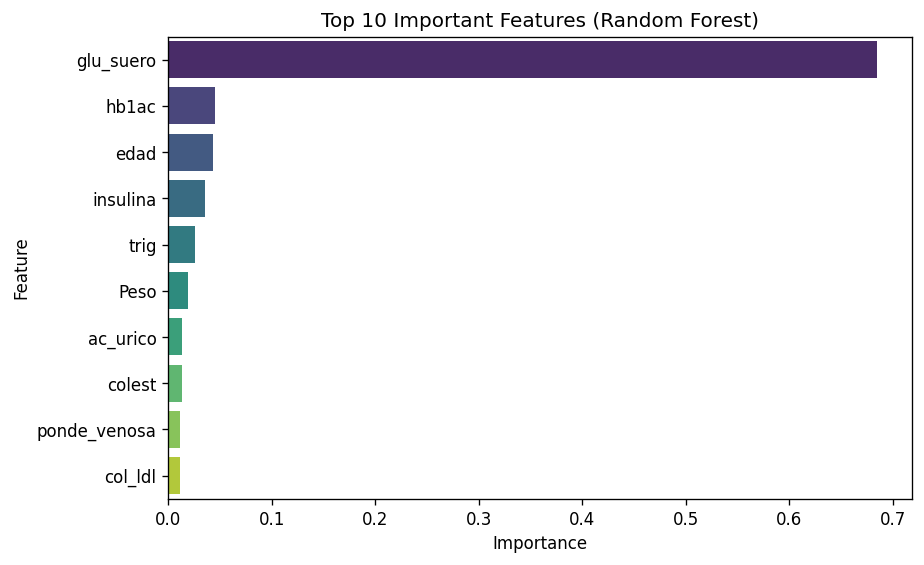

In [42]:
plt.figure(figsize=(8,5), dpi=120)
sns.barplot(
    x='Importance',
    y='Feature',
    data=importance_df.head(10),
    palette='viridis'
)
plt.title('Top 10 Important Features (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [43]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

In [44]:
classes = y.unique()  # e.g., ['Low', 'Medium', 'High']
y_test_bin = label_binarize(y_test, classes=classes)


In [45]:
y_prob = model.predict_proba(X_test)

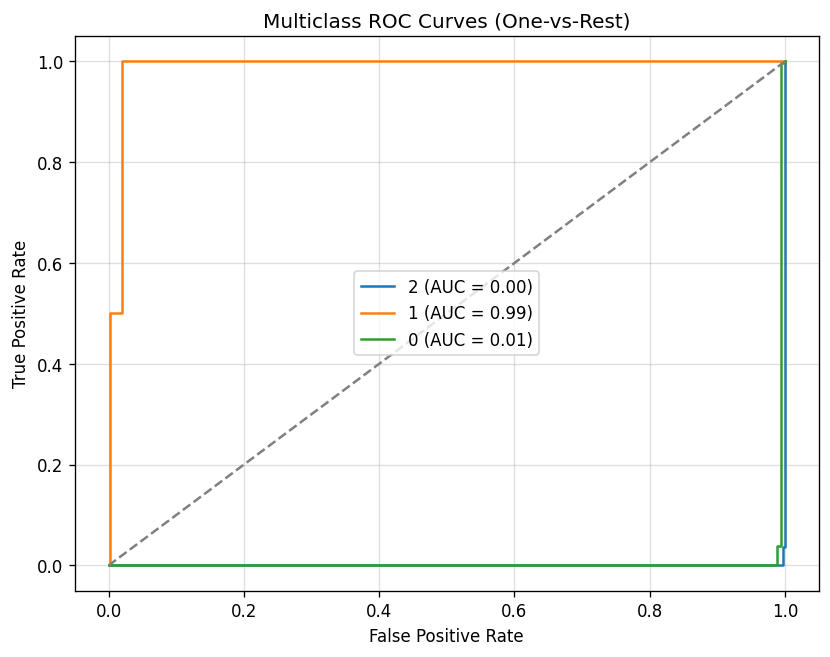

In [46]:
plt.figure(figsize=(8,6), dpi=120)

for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{cls} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.title('Multiclass ROC Curves (One-vs-Rest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(alpha=0.4)
plt.show()


In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [49]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),       # Scale numeric columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)  # Encode categorical
    ]
)


In [50]:
submission = pd.DataFrame({
    'folio_i': df.loc[y_test.index, 'folio_i'],
    'predicted_risk': rf.predict(X_test)
})

submission.to_csv('diabetes_predictions.csv', index=False)


## Thank you..pls upvote!!!